**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

**Load Dataset**

In [3]:
A=pd.read_excel("EastWestAirlines_data.xlsx")
A

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
A1=A.drop(['ID#'],axis=1)
A1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# H-Clustering

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
A_norm = norm_func(A1)
A_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


**Dendogram**

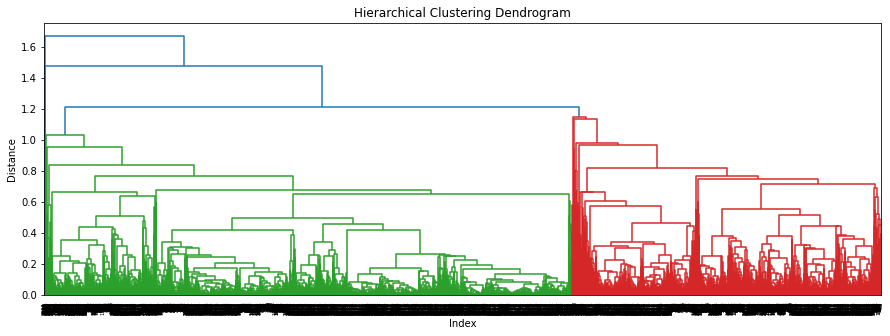

In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(A_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show() 

**As We Can See H-Clustering Model Doesn't Work On Large Datasets. So, We Go For Another Clustering Model**

# KMeans Clustering

In [24]:
A1_norm=StandardScaler().fit_transform(A1)
A1_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.71886061e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.71886061e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.71886061e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -5.41896243e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -1.25567855e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -1.25567855e+00]])

In [25]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(A1_norm)
    wcss.append(kmeans.inertia_)

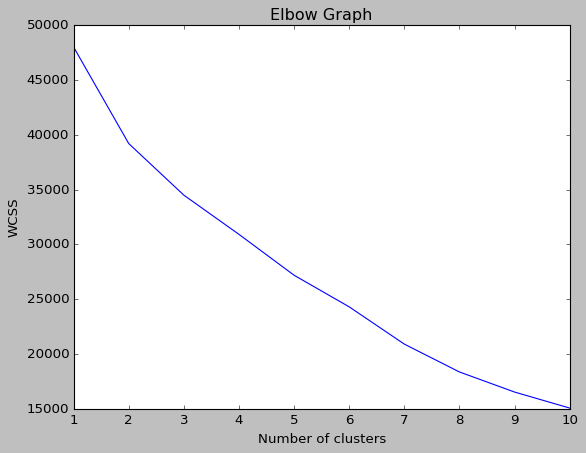

In [26]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Build Cluster Algorithm Using K=5**

In [33]:
A3=KMeans(5,random_state=30).fit(A1_norm)
A3

KMeans(n_clusters=5, random_state=30)

In [34]:
A3.labels_

array([2, 2, 2, ..., 3, 0, 0], dtype=int32)

In [35]:
A3.cluster_centers_

array([[-4.05973660e-01, -7.18688717e-02, -7.18256340e-01,
         1.47623803e-02, -6.27665798e-02, -5.83356560e-01,
        -5.77240929e-01, -2.11604846e-01, -2.34346199e-01,
        -1.03011443e+00, -7.66919299e-01, -1.25567855e+00],
       [ 1.22149546e+00,  8.75175693e-01,  1.33451058e-01,
         1.76363872e-01, -6.27665798e-02,  6.84760987e-01,
         1.76255492e+00,  3.68410791e+00,  4.01858281e+00,
         3.04040232e-01,  9.54114535e-01,  2.34583156e-01],
       [-1.48502610e-01, -4.21853482e-02, -4.30809867e-01,
         3.01493181e-02, -5.98242929e-02, -4.11094452e-01,
        -3.12170358e-01, -1.43812895e-01, -1.53326170e-01,
         3.83329735e-01, -7.94155360e-02,  6.55667290e-01],
       [ 4.47818855e-01,  1.71185528e-02,  1.34466651e+00,
        -8.56515363e-02, -5.32451644e-02,  1.07910388e+00,
         7.85427293e-01, -7.41113141e-02, -8.35558061e-02,
         3.10142655e-01,  7.18848840e-01,  9.22820869e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.0220844

In [39]:
# assigning clusters to dataframe
A4=A1.copy()
A4['clusters']=A3.labels_
A4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [40]:
A4.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,32694.177625,88.519136,1.070658,1.016683,1.000000,3057.982336,6.058881,163.801766,0.484789,1991.500491,0.000000,2.000000
1,1,196682.952703,821.121622,2.243243,1.040541,1.000000,33680.418919,28.527027,5617.932432,16.614865,4746.364865,0.831081,3.000000
2,2,58637.749569,111.481333,1.466399,1.018955,1.000574,7217.758759,8.604250,258.712809,0.792074,4910.087881,0.331993,0.001723
3,3,118724.927509,157.356877,3.910781,1.001859,1.001859,43202.990706,19.144052,356.297398,1.056691,4758.965613,0.717472,1.000000
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000


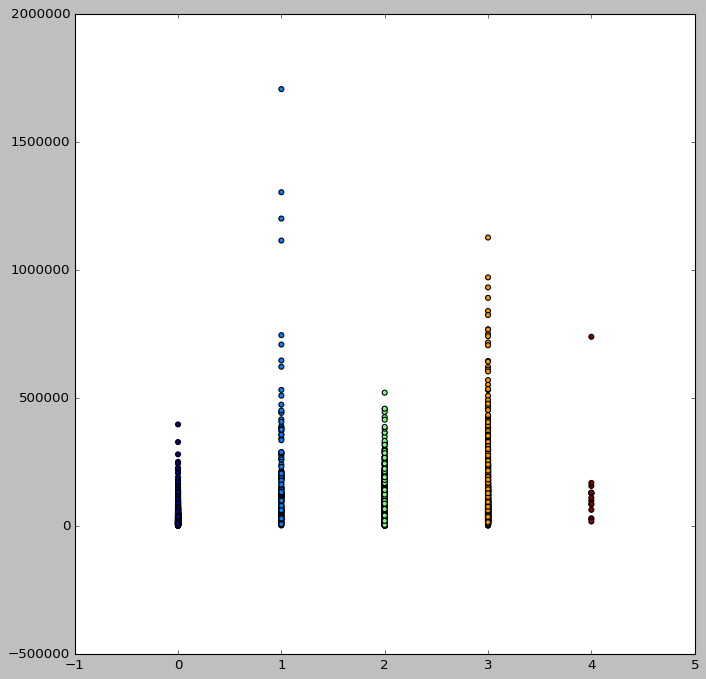

In [44]:
# plotting the clusters
plt.figure(figsize=(10, 10))  
plt.scatter(A4['clusters'],A4['Balance'], c=A3.labels_) 